In [183]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

One of the great things about using computers to assist with our data anaysis is that they enable "brute-force" methods that would be unbearably tedious to calculate by hand. In general, we can categorize these techniques as "reapeated sampling methods", of which, we will cover two: Monte Carlo and Boostrapping.

Note: much of the code shown in this notebook is NOT efficient, meaning some code blocks will take a while to complete. This is because I wanted you to see exactly how these calculations are performed, which is easier to do when we explicitely calculate values the way we might on paper. If you want a fun challenge, see if you can find more efficient ways for the code to execute!

# Monte Carlo Methods

In the [Monte Carlo Method](https://en.wikipedia.org/wiki/Monte_Carlo_method#Applications), we use random sampling from a defined probability distribution to generate large sets of data that we then analyze for a particular trend or outcome. An overview can be summarized as:

1.   Define possible domain of inputs
2.   Generate inputs based off of a probability domain spanning the domain
3.   Use randomly generated data to calculate outputs
4.   Analyze outputs

A classic example of the application of the Monte Carlo Method is in calculating the value of $\pi$.



## Class Problem 1

Let's say we have a circle with a radius $r = 1$.

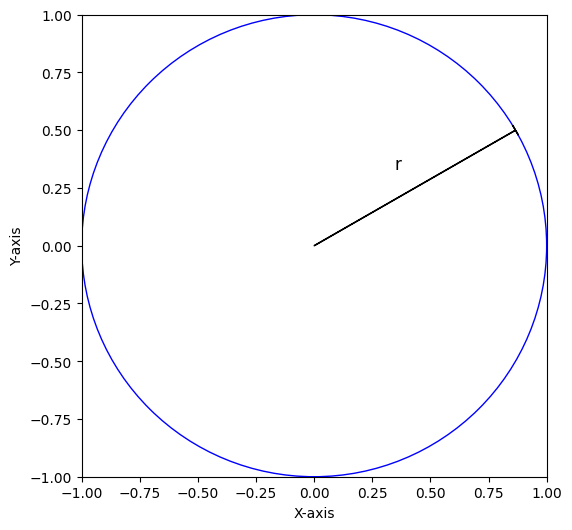

In [184]:
import numpy as np
import matplotlib.pyplot as plt

# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 6))

# Create the circle
circle = plt.Circle((0, 0), 1, fill=False, color = 'blue')
ax.add_artist(circle)

# Set the axis limits
ax.set_xlim([-1.0, 1.0])
ax.set_ylim([-1.0, 1.0])

# Calculate the coordinates of the arrow endpoint
angle_degrees = 30
angle_radians = np.deg2rad(angle_degrees)  # Convert degrees to radians
x_end = np.cos(angle_radians)
y_end = np.sin(angle_radians)

# Create the arrow
ax.arrow(0, 0, x_end, y_end, head_width=0.05, head_length=0.0, fc='k', ec='k')

# Add the label 'r'
ax.text(x_end / 2.5, y_end / 1.5, 'r', fontsize=12)

# Add axis labels
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# Show the plot
plt.show()

We know that the area of the circle is equal to: $A_{circ} = \pi r^2$. The total area of the square is: $A_{sq} = x y$.

For this example, since $r = 1, A_{circ} = \pi$ and since $x = y = 2$, $A_{sq} = 4$.

If we were to throw a dart at this square, assuming we have a 100% change to land *somewhere* in the square (note, what type of distribution does this represent?), we have a probability $P = \frac{\pi}{4}$ of landing inside the circle.

For instance, we could throw 10 darts at the board, then calculate the value of $\pi$ by multiplying the ratio by $4$. The result will likely not be a great approximation for $\pi$. We can improve the approximation by increasing the number of throws.

**Use the Monte Carlo Method to estimate the value of $\pi$. Produce a result for $N$ throws, where $N = 10, 100, 1000, 10000, 100000$**.

**Repeat the process 10 times for each $N$. Calculate the mean ($\bar{x}$) and standard deviation ($\sigma$) for each group of 10.**

**Finally, produce a plot (log plot) of the $\pi$ estimate for each $N$. Include y-axis error bars for each data point, representing the Standard Error: $se =\frac{\sigma}{\sqrt{N}}$**.

# Random Walks

A [Random Walk](https://en.wikipedia.org/wiki/Random_walk) is another great example of where we can use the Monte Carlo Method to produced a desired result. We see applications of the random walk process across many disciplines, so knowing how the process works is important!

In the most basic example, let's say we start at position $x = 0$ and we are limited to movement in the x-direction (positive or negative). We are allowed to take a specified number of steps, with each step independent of the last.

The questions we want to answer are:
* Where do we *expect* to land after $N$ steps?
* What is the variance of our result? (aka, what is the spread of where we land over repeated trials?)

It is fairly straight forward write up code to calculate the random walk in 1-D:



In [185]:
# 1-D random walk

# define number of steps to take
step_N = np.array([10, 100, 1000, 10000])

# define starting position
x_0 = 0

# define left vs right movement
movement = [-1, 1]

# function to perform random walk
# two inputs, starting point and number of steps to take
def random_walk(x_0, step_N):
  x = x_0
  random_movement = 0
  for i in range(step_N):
    random_movement = random.choice(movement)
    x += random_movement
  return x

# peform random walk a number of times

# define array to store values in
x1 = np.zeros(step_N[0])
x2 = np.zeros(step_N[1])
x3 = np.zeros(step_N[2])
x4 = np.zeros(step_N[3])

# perform random walk
for i in range(len(x1)):
  x1[i] = random_walk(x_0, step_N[0])

for i in range(len(x2)):
  x2[i] = random_walk(x_0, step_N[1])

for i in range(len(x3)):
  x3[i] = random_walk(x_0, step_N[2])

for i in range(len(x4)):
  x4[i] = random_walk(x_0, step_N[3])

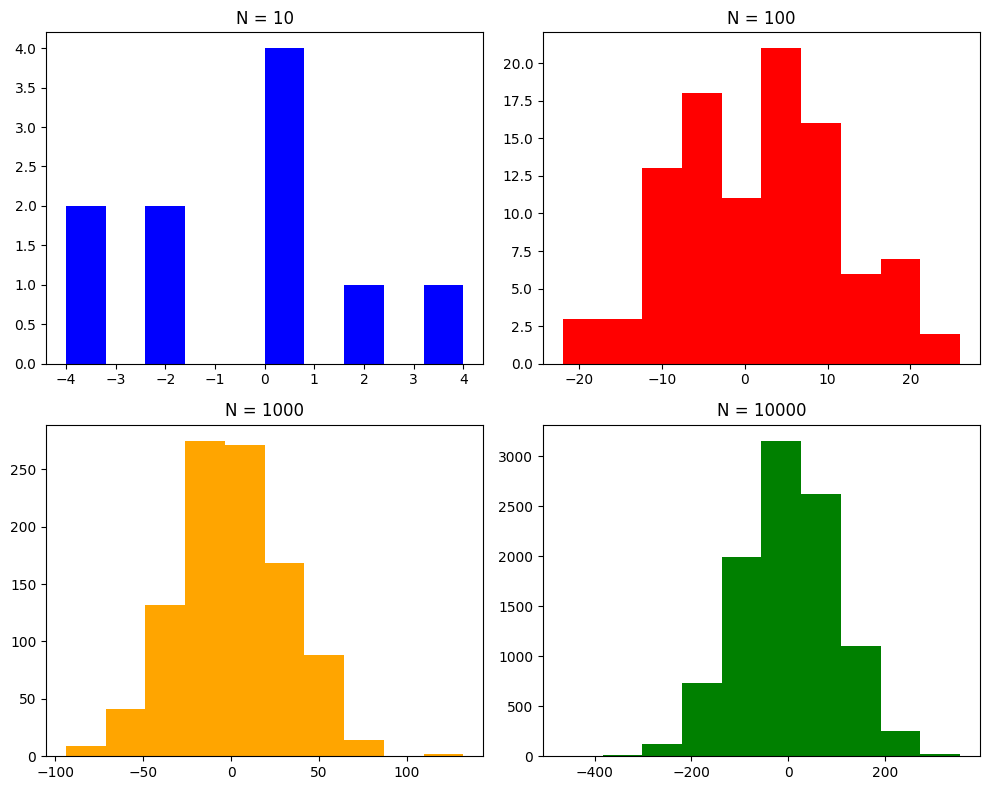

In [186]:
# Create a figure and an array of subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histograms on each subplot
axes[0, 0].hist(x1, color = 'blue')
axes[0, 0].set_title("N = 10")

axes[0, 1].hist(x2, color = 'red')
axes[0, 1].set_title("N = 100")

axes[1, 0].hist(x3, color = 'orange')
axes[1, 0].set_title("N = 1000")

axes[1, 1].hist(x4, color = 'green')
axes[1, 1].set_title("N = 10000")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

From the histogram plots, we can see that the most likely location to end up after $N$ steps is 0. As we increase the possible number of steps, we increase the spread away from 0. In fact, the *variance* of the position after $N$ steps should approach $N$, which means the standard deviation ($\sigma$) should approach $\sqrt{N}$.

In [187]:
ss = np.array([np.var(x1), np.var(x2), np.var(x3), np.var(x4)])
data = {'N': step_N, 'Variance': ss, 'StDev': np.sqrt(ss)}
df = pd.DataFrame(data)
df

,N,Variance,StDev
0,10,5.640000,2.374868
1,100,96.720000,9.834633
2,1000,946.799936,30.770114
3,10000,9805.025566,99.020329


## Class Problem 2

Let's see how the 1-D random walk behaves as we change some of the conditions:

1. Use a step size of two (2) instead of one (1). What happens to the variance? Does it still scale linearly with $N$?

2. What if we change the probability to move to the right ($+1$) to be 0.6 and the probability to move the the left ($-1$) to be 0.4. What happens to the mean? What about the variance?

# Bootstrapping Methods

Similar to the Monte Carlo Method, [Bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) methods are a statistical technique used to simulate data, but instead of sampling from a specified distribution, we *resample* our data (generally with replacement). Using the bootstrap technique, we can create calculate many sample statistics regardless of whether or not the distribution is normal.

Let's see how the method works by calculating a mean and 95% CI around the mean a data set containing body fat information from 92 people. Make sure to import "body_fat.csv" to run the script properly!



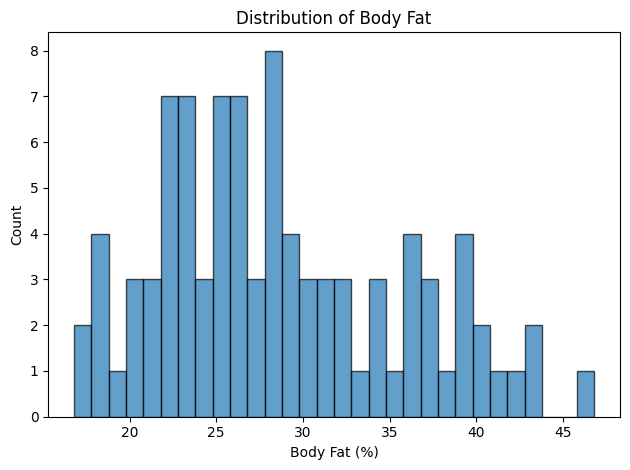

Mean: 28.57


In [188]:
# Upload CSV file
df = pd.read_csv('body_fat.csv')

# create histogram
plt.hist(df, bins = 30, edgecolor='black', alpha=0.7)

plt.xlabel("Body Fat (%)")  # Add x-axis label
plt.ylabel("Count")  # Add y-axis label
plt.title("Distribution of Body Fat")  # Add title (optional)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

print(f"Mean: {np.mean(df):.2f}")

From the histogram, we see there is a spread of results between 16.8% and 46.8%, with the highest countds between 20% and 30%. This data is a poor fit to a normal distribution (you can test it yourself by making a Q-Q plot!), which means many of our statistical methods are not valid to use with this data.

However, let's say we wanted to know the mean with a set level of confidence. We can bootstrap a confidence interval!

The way we do this is by creating a large number (typically 1,000 to 10,000) number of data sets that are generated by resampling our original data with replacement. This means it is possible for a value that only has 1 count in the original data set to occur multiple times in a bootstrapped data set.

In [189]:
# bootstrap method

# define number of datasets to generate
dataset_N = 2000

# define array to store bootstrap data
boot_data = np.zeros(dataset_N)

# define array to store randomly sampled values
dummy_array = np.zeros(len(df))

# nested loop to find mean of dummy_array, then store value in boot_data
for i in range(dataset_N):
  for j in range(len(dummy_array)):
    dummy_array[j] = df['%Fat'].sample(n=1).iloc[0]
  boot_data[i] = np.mean(dummy_array)

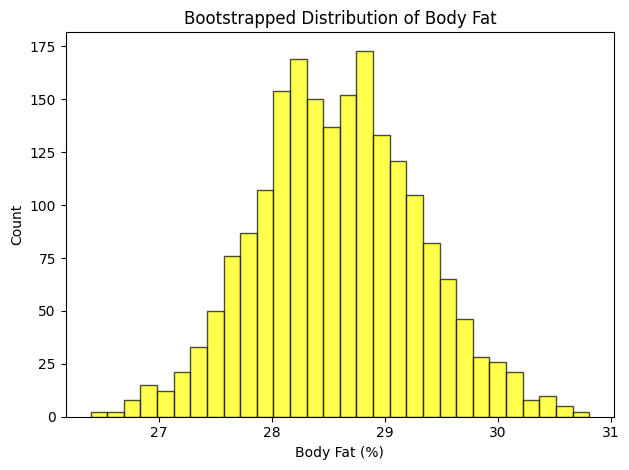

In [190]:
# create histogram
plt.hist(boot_data, bins = 30, edgecolor='black', color = 'yellow', alpha=0.7)

plt.xlabel("Body Fat (%)")  # Add x-axis label
plt.ylabel("Count")  # Add y-axis label
plt.title("Bootstrapped Distribution of Body Fat")  # Add title (optional)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

The plot above is referred to as the sampling distribution of means (or mean of means), as we have produced a large number of datasets and calculated the mean for each and plotted the result.

We can now have python calculate the mean of means as well as a 95% confidence interval around the mean by ordering the bootstrapped mean (data stored in `boot_data`) from smallest to largest, then finding the values in the bottom 2.5% and top 97.5%.

In [191]:
# mean of means calculation
mean_mean = np.mean(boot_data)

# finding 95% confidence interval
lower_bound = np.percentile(boot_data, 2.5)
upper_bound = np.percentile(boot_data, 97.5)

print(f"Mean of Means: {mean_mean:.2f}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

Mean of Means: 28.59
95% Confidence Interval: (27.22, 30.04)


## Class Problem 3

We were able to show how to bootstrap the confidence interval around a mean in the previous example. However, the bootstrap technique can be used for other statistical measures as well, including regression coefficients (slope and intercept for example).

To bootstrap a linear regression, instead of resampling the data points directly, we [resample the residuals](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)#Resampling_residuals), where an expected value from the fit, $\hat{y}_i$, is calculated and we add random residual value to it. The random residual value is drawn at random from the list of original residuals.

After creating a new set of data (the same length as the original), we apply a linear fit and find the slope and intercept. This process is repeated many times (~1000 or more).

See if you can bootstrap a confidence interval from the data used in Class Problem 2 on Day04. The data is presented below.

In [192]:
# Sample data
position = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]) # linear coordinate, in cm
temp = np.array([14, 18, 36, 30, 59, 60, 62, 79, 99]) # temp in C